In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/Iris.csv')
print("\nData info")
print(data.info())
print("\nData Description")
print(data.describe())


Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Data Description
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0

In [ ]:
print("Sample data")
print(data.head())

Sample data
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Data preprocessing

In [ ]:
# Check missing values
print("\nMissing values:")
print(data.isnull().sum())

# Select features (X) and target (y)
X = data.drop(['Id','Species'], axis = 1)
y = data['Species']

# Ordinal Encode target variable
encoder = OrdinalEncoder()
y = encoder.fit_transform(y.values.reshape(-1, 1)).flatten()


Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("\nData types in X_train:")
print(X_train.dtypes)


Shape of X_train: (120, 4)
Shape of X_test: (30, 4)

Data types in X_train:
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object


In [ ]:
# 4. Model Creation
model = GaussianNB()

# 5. Model Training
model.fit(X_train, y_train)

# 6. Prediction
y_pred = model.predict(X_test)

In [ ]:
# 7. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, zero_division = 0)

print("\nAccuracy Score:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)


Accuracy Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


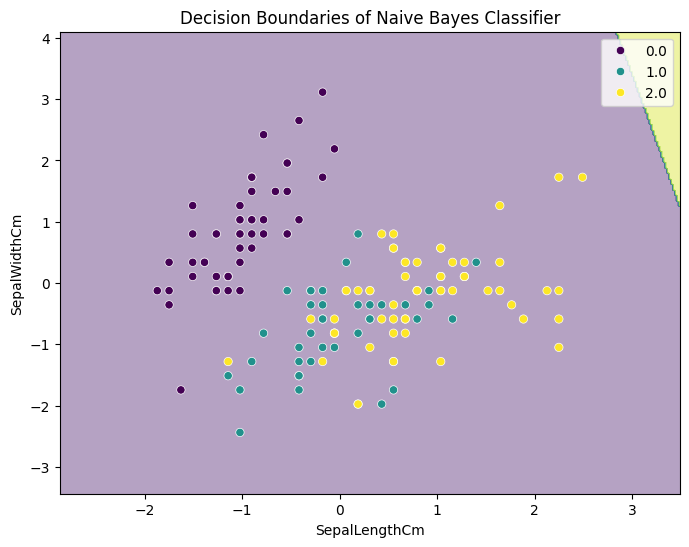

In [ ]:
# 8. Visualization
# Decision Boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
# Create a dataframe with same structure as X (with filled 0) except we put in our grid values for feature 0 and feature 1
X_grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel(), np.zeros((xx.size, X.shape[1] - 2))], columns = X.columns)
X_grid.iloc[:, 0] = xx.ravel()
X_grid.iloc[:, 1] = yy.ravel()
Z = model.predict(X_grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette = 'viridis')
plt.title("Decision Boundaries of Naive Bayes Classifier")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()


***Insights & Stats***

Feature Means:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -1.033966      0.893215      -1.311418     -1.257101
1       0.092304     -0.655491       0.274546      0.162086
2       0.836058     -0.202092       1.001886      1.053537

Descriptive Statistics of Target Variable:
count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
dtype: float64

Distribution of Target Variable:


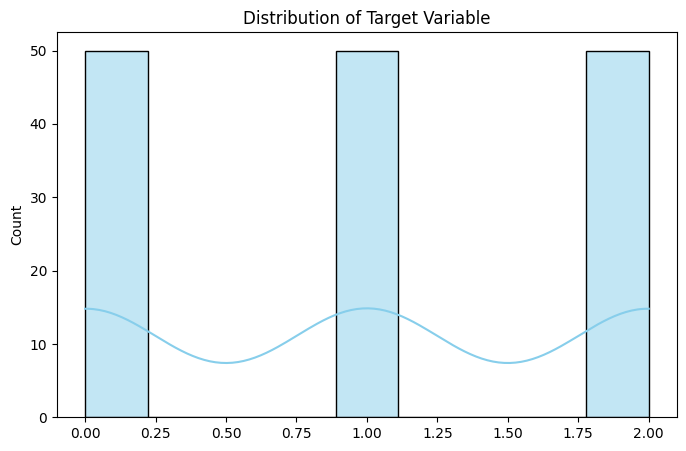


Descriptive Statistics of Numerical Features:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [ ]:
# 9. Insights and Stats
print("\n***Insights & Stats***")

# Calculating feature means and printing them
feature_means = pd.DataFrame(model.theta_, columns = X.columns)
print("\nFeature Means:")
print(feature_means)

print("\nDescriptive Statistics of Target Variable:")
print(pd.Series(y).describe())

print("\nDistribution of Target Variable:")
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, color='skyblue')
plt.title("Distribution of Target Variable")
plt.show()

# Descriptive statistics of numerical features
print("\nDescriptive Statistics of Numerical Features:")
print(X.describe())